In [46]:
#Install Modules
%pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [47]:
#Import Modules
import os
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Create DataFrames

holiday_data = pd.read_csv('../data/holiday_data.csv')
location_data = pd.read_csv('../data/location_data.csv')
trans_001_data = pd.read_json('../data/transactions_001_system3.json')
trans_002_data = pd.read_json('../data/transactions_002_system3.json')
trans_003_data = pd.read_csv('../data/transactions_003_system2.txt', sep='\t')
trans_004_data = pd.read_csv('../data/transactions_004_system2.txt', sep='\t')
trans_005_data = pd.read_json('../data/transactions_005_system3.json')
trans_006_data = pd.read_csv('../data/transactions_006_system2.txt', sep='\t')
trans_007_data = pd.read_csv('../data/transactions_007_system2.txt', sep='\t')
trans_008_data = pd.read_csv('../data/transactions_008_system1.csv')
trans_009_data = pd.read_csv('../data/transactions_009_system2.txt', sep='\t')
trans_010_data = pd.read_json('../data/transactions_010_system3.json')
weather_data = pd.read_csv('../data/weather_data.csv')

trans_dfs = [trans_001_data, trans_002_data, trans_003_data, trans_004_data, trans_005_data, trans_006_data, trans_007_data, trans_008_data, trans_009_data, trans_010_data]

# Preliminary Data Analysis & Data Transformation

## Holiday Data

In [49]:
# Holiday Data is a pretty small dataset just listing the holidays so we can just look at the whole thing. 

holiday_data.sort_values(by='date', inplace=True)
holiday_data['date'] = pd.to_datetime(holiday_data['date'])
print(holiday_data)

#The 2022 November and December holidays are missing from the dataset, but makes sense as the data goes up to 2022 October.

         date  holiday
0  2019-01-01     True
1  2019-05-27     True
2  2019-07-04     True
3  2019-09-02     True
4  2019-11-28     True
5  2019-12-25     True
6  2020-01-01     True
7  2020-05-25     True
8  2020-07-04     True
9  2020-09-07     True
10 2020-11-26     True
11 2020-12-25     True
12 2021-01-01     True
13 2021-05-31     True
14 2021-07-04     True
15 2021-09-06     True
16 2021-11-25     True
17 2021-12-25     True
18 2022-01-01     True
19 2022-05-30     True
20 2022-07-04     True
21 2022-09-05     True


In [50]:
# Reindex the holiday data to include all dates from 2019-01-01 to 2022-10-31, and fll the holidays with normal values.

date_range = pd.date_range(start='2019-01-01', end='2022-10-31') 

# Note that it would be better to use the date range from the transactions data after it has been combined and cleaned as it would be able to adjust as the data changes, but I already did the transaction data later and am just writing a few notes.

holiday_data = holiday_data.set_index('date')
holiday_data = holiday_data.reindex(date_range, fill_value='False')
holiday_data.reset_index(inplace=True)
holiday_data.rename(columns={'index':'date'}, inplace=True)



In [51]:
holiday_data

,date,holiday
0,2019-01-01,True
1,2019-01-02,False
2,2019-01-03,False
3,2019-01-04,False
4,2019-01-05,False
...,...,...
1395,2022-10-27,False
1396,2022-10-28,False
1397,2022-10-29,False
1398,2022-10-30,False


In [52]:
# Add columns for day, month, year, and day of week to the holiday data as in ER diagram
holiday_data['day'] = holiday_data['date'].dt.day
holiday_data['month'] = holiday_data['date'].dt.month
holiday_data['year'] = holiday_data['date'].dt.year
holiday_data['day_of_week'] = holiday_data['date'].dt.dayofweek
holiday_data

,date,holiday,day,month,year,day_of_week
0,2019-01-01,True,1,1,2019,1
1,2019-01-02,False,2,1,2019,2
2,2019-01-03,False,3,1,2019,3
3,2019-01-04,False,4,1,2019,4
4,2019-01-05,False,5,1,2019,5
...,...,...,...,...,...,...
1395,2022-10-27,False,27,10,2022,3
1396,2022-10-28,False,28,10,2022,4
1397,2022-10-29,False,29,10,2022,5
1398,2022-10-30,False,30,10,2022,6


## Location Data

In [53]:
# Location Data is also a small dataset so we can just look at the whole thing.
location_data

,location_id,population,elevation
0,1,18428,375
1,2,32926,274
2,3,74138,505
3,4,14255,360
4,5,12686,386
5,6,86372,435
6,7,13400,186
7,8,52185,398
8,9,13641,350
9,10,425336,266


In [54]:
location_data.describe()

# Statistically, the population max is quite an outlier compared to the rest of the data, but considering the type of data, it is probably just a large city


,location_id,population,elevation
count,13.00000,13.000000,13.000000
mean,7.00000,86936.769231,359.923077
std,3.89444,114964.826457,84.322260
min,1.00000,12686.000000,186.000000
25%,4.00000,14255.000000,310.000000
50%,7.00000,52185.000000,375.000000
75%,10.00000,86372.000000,398.000000
max,13.00000,425336.000000,505.000000


In [55]:
location_data.info() #Doesn't show anything noteworthy, but it's good to check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   location_id  13 non-null     int64
 1   population   13 non-null     int64
 2   elevation    13 non-null     int64
dtypes: int64(3)
memory usage: 440.0 bytes


## Weather Data

In [56]:
weather_data.info()

# Date is shown to be an object, but we should transform it to a datetime object
weather_data['date'] = pd.to_datetime(weather_data['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17278 entries, 0 to 17277
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    17278 non-null  int64  
 1   date           17278 non-null  object 
 2   temperature    17278 non-null  float64
 3   pressure       17278 non-null  float64
 4   humidity       17278 non-null  float64
 5   cloudy         17278 non-null  bool   
 6   precipitation  17278 non-null  bool   
dtypes: bool(2), float64(3), int64(1), object(1)
memory usage: 708.8+ KB


In [57]:
weather_data.describe() # Nothing crazy here

,location_id,date,temperature,pressure,humidity
count,17278.000000,17278,17278.000000,17278.000000,17278.000000
mean,6.997859,2020-11-30 22:52:24.530617088,44.654954,1001.308297,0.716094
min,1.000000,2019-01-01 00:00:00,-1.120000,955.000000,0.000000
25%,4.000000,2019-12-18 00:00:00,25.340000,979.530516,0.580000
50%,7.000000,2020-12-03 00:00:00,46.580000,1001.161972,0.810000
75%,10.000000,2021-11-15 18:00:00,63.140000,1023.016432,0.930000
max,13.000000,2022-10-30 00:00:00,86.360000,1050.000000,1.000000
std,3.743149,NaN,21.218299,25.145924,0.278936


In [58]:
# Check for Null Values
print("Number of Null Values: " + str(weather_data.isnull().sum().sum()) + '\n')
# No null values in weather data is good, but we have to remember that there is other missing rows completely.

Number of Null Values: 0



<Axes: title={'center': 'Temperature Over Time'}, xlabel='date'>

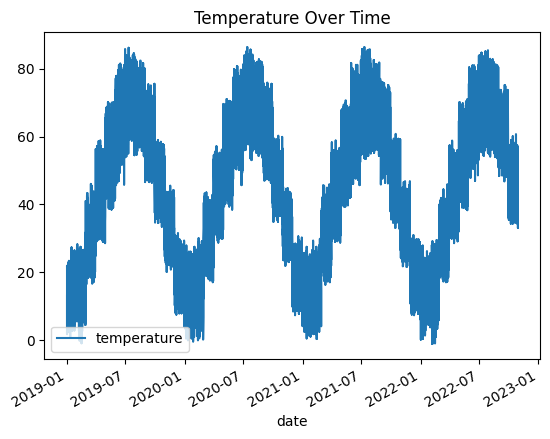

In [59]:
# Plot the weather data
weather_data.plot(x='date', y='temperature', kind='line', title='Temperature Over Time')

# There's a clear seasonal pattern to the temperature which makes sense, and there doesn't seem to be any clear outliers or data that seems weird. You could continue to try using different graphs and compare different relationships to make sure that everything makes sense.

In [60]:
# Find missing dates for each location
for i in range(13):
    print('Missing Dates for Location ' + str(i+1) + ':')
    print(pd.date_range(start='2019-01-01', end='2022-10-30').difference(weather_data[weather_data['location_id'] == i+1]['date']))
    print('\n')

# There are missing dates for each location, but the missing dates are different for each location. We can adjust for this by either removing the missing dates from the dataset, filling it in with something else or leaving it as null and understanding that the values have not been measured properly. In this case, I will choose to attempt to interpolate the data to fill in the missing dates as I feel it might be helpful to have a rough estiimate of the weather conditions for the missing dates, but it is important to note that this is not a perfect solution and the data will be less accurate for the missing dates. A column could also be added to the dataframe to indicate if the data is interpolated or not.

Missing Dates for Location 1:
DatetimeIndex(['2019-01-01', '2019-01-08', '2019-02-04', '2019-03-09',
               '2019-03-25', '2019-03-29', '2019-04-09', '2019-04-18',
               '2019-04-27', '2019-05-20', '2019-05-22', '2019-06-09',
               '2019-06-29', '2019-07-18', '2019-08-02', '2019-08-16',
               '2019-08-23', '2019-09-11', '2019-09-26', '2019-10-17',
               '2019-11-10', '2019-11-23', '2020-01-05', '2020-02-15',
               '2020-02-21', '2020-03-15', '2020-04-24', '2020-07-14',
               '2020-08-27', '2020-08-30', '2020-09-21', '2020-10-07',
               '2020-10-11', '2020-11-27', '2020-12-17', '2021-02-18',
               '2021-03-31', '2021-04-05', '2021-04-24', '2021-05-02',
               '2021-08-04', '2021-08-27', '2021-09-05', '2021-09-24',
               '2021-09-28', '2021-10-04', '2021-10-13', '2021-10-25',
               '2021-12-15', '2022-01-11', '2022-01-16', '2022-01-19',
               '2022-01-25', '2022-02-09', '202

In [61]:
# Fill in missing dates with NaN weather for each location    
for i in range(weather_data['location_id'].max()):

    # Find dates not in each location and add them as empty rows in a temporary dataframe.
    temp_df = pd.DataFrame(
        pd.date_range(start='2019-01-01', end='2022-10-30').difference(
            weather_data[weather_data['location_id'] == i+1]['date']
            ), columns=['date']
        )
    temp_df['location_id'] = i+1

    # Add them to the weather data
    weather_data = pd.concat([weather_data, temp_df])

In [62]:
# Interpolate the missing temperature, humidity and pressure values
weather_data = (weather_data.set_index('date')
    .groupby('location_id')[['temperature', 'humidity', 'pressure', 'cloudy', 'precipitation']]
    .apply(lambda x: x.sort_values('date').interpolate()))
weather_data.reset_index(inplace=True)

In [63]:
# Backfill the missing cloudy and precipitation values as they cannot be interpolated as well as filling in any locations missing the weather data for the first date as it will not be interpolated. We are doing this assuming that a day will be somewhat similar to the previous day in terms of weather. Somone more knowledgeable may know a better way to estimate these values.

weather_data.bfill(inplace=True)

## Transaction Data

In [64]:
# Check Info
for i in range(len(trans_dfs)):
    print('Transaction ' + str(i+1) + ' Info:')
    print(trans_dfs[i].info())
    print('\n')

#Inspecting the info, we can see that there are a few transactions that are missing profit.

#We can also see that the date column is not in datetime format and the profit is not a float for some of the datasets that don't come from json data/system 3, so we can fix that.

Transaction 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9335 entries, 0 to 9334
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location_id     9335 non-null   int64         
 1   date            9335 non-null   datetime64[ns]
 2   transaction_id  9335 non-null   int64         
 3   profit          9333 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 291.8 KB
None


Transaction 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10371 entries, 0 to 10370
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location_id     10371 non-null  int64         
 1   date            10371 non-null  datetime64[ns]
 2   transaction_id  10371 non-null  int64         
 3   profit          10368 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64

### Dealing With Formatting

In [65]:
# Fixing the date and profit column types
for i in range(len(trans_dfs)):
    if(trans_dfs[i]['profit'].dtype == 'O'):
        trans_dfs[i]['profit'] = trans_dfs[i]['profit'].str.lstrip('0')
        trans_dfs[i]['profit'] = trans_dfs[i]['profit'].str.replace('$', '')
        trans_dfs[i] = trans_dfs[i].astype({'date': 'datetime64[ns]', 'profit': 'float64'})

# Check Info to make sure it worked
for i in range(len(trans_dfs)):
    print('Transaction ' + str(i+1) + ' Info:')
    print(trans_dfs[i].info())
    print('\n')

Transaction 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9335 entries, 0 to 9334
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location_id     9335 non-null   int64         
 1   date            9335 non-null   datetime64[ns]
 2   transaction_id  9335 non-null   int64         
 3   profit          9333 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 291.8 KB
None


Transaction 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10371 entries, 0 to 10370
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location_id     10371 non-null  int64         
 1   date            10371 non-null  datetime64[ns]
 2   transaction_id  10371 non-null  int64         
 3   profit          10368 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64

### Dealing With Missing Values

In [66]:
# Find Rows with Null Values
for i in range(len(trans_dfs)):
    print('Null Values in ' + 'Transaction ' + str(i+1) + ':')  
    print(trans_dfs[i][trans_dfs[i].isnull().any(axis=1)])
    print('\n')

# We can see that there are a few rows will NaN values. Interstingly, these all have a transaction_id of 1, which means that it is the first transaction of that respective day. Let's take a closer look at the transactions on these dates.

Null Values in Transaction 1:
      location_id       date  transaction_id  profit
2973            1 2020-02-07               1     NaN
3031            1 2020-02-14               1     NaN


Null Values in Transaction 2:
      location_id       date  transaction_id  profit
3545            2 2020-05-29               1     NaN
3546            2 2020-05-30               1     NaN
3693            2 2020-06-15               1     NaN


Null Values in Transaction 3:
      location_id       date  transaction_id  profit
2655            3 2020-02-10               1     NaN


Null Values in Transaction 4:
      location_id       date  transaction_id  profit
2186            4 2020-02-07               1     NaN
2215            4 2020-02-14               1     NaN
2307            4 2020-05-28               1     NaN
2309            4 2020-05-30               1     NaN
3489            4 2021-02-05               1     NaN
3545            4 2021-02-17               1     NaN


Null Values in Transacti

In [67]:
# Here we will look at the transactions on the dates that have null values to see if there is a pattern or if it is just random.

for i in range(len(trans_dfs)):
    print('Transaction ' + str(i+1) + ' Null Values:')
    print(trans_dfs[i][
        trans_dfs[i]['date'].isin(
            trans_dfs[i][
                trans_dfs[i].isnull().any(axis=1)
                ]['date']
        )
        ])
    
# We can see that the transactions with null values are all the only transaction of the day. This probably means that the profit was not recorded because there was no profit. We can fill in the null values with 0, though we should check with someone who knows the data to make sure that this is the correct assumption.
    
for i in range(len(trans_dfs)):
    trans_dfs[i]['profit'].fillna(0, inplace=True)

Transaction 1 Null Values:
      location_id       date  transaction_id  profit
2973            1 2020-02-07               1     NaN
3031            1 2020-02-14               1     NaN
Transaction 2 Null Values:
      location_id       date  transaction_id  profit
3545            2 2020-05-29               1     NaN
3546            2 2020-05-30               1     NaN
3693            2 2020-06-15               1     NaN
Transaction 3 Null Values:
      location_id       date  transaction_id  profit
2655            3 2020-02-10               1     NaN
Transaction 4 Null Values:
      location_id       date  transaction_id  profit
2186            4 2020-02-07               1     NaN
2215            4 2020-02-14               1     NaN
2307            4 2020-05-28               1     NaN
2309            4 2020-05-30               1     NaN
3489            4 2021-02-05               1     NaN
3545            4 2021-02-17               1     NaN
Transaction 5 Null Values:
      location_id

In [68]:
# Check to make sure it worked
for df in trans_dfs:
    print(df[df.isnull().any(axis=1)])

# Looks all good!

Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []
Empty DataFrame
Columns: [location_id, date, transaction_id, profit]
Index: []


# Create DB

In [69]:
# Create Database and Cursor
try:
    conn = sqlite3.connect('tubing.db')
except Exception as e:
    print(e)


if(conn.total_changes == 0):
    print('Connection Established')
cursor = conn.cursor()

Connection Established


# Create Tables

In [70]:
# Create Location Table
location_table = '''CREATE TABLE IF NOT EXISTS location (
    location_id INTEGER PRIMARY KEY,
    elevation INTEGER,
    population INTEGER
)'''

cursor.execute(location_table)

In [71]:
# Create Date Table
date_table = '''CREATE TABLE IF NOT EXISTS date (
    date DATE PRIMARY KEY,
    day INTEGER,
    day_of_week INTEGER,
    month INTEGER,
    year INTEGER,
    holiday BOOLEAN
)'''

cursor.execute(date_table)

In [72]:
# Create Weather Table
weather_table = '''CREATE TABLE IF NOT EXISTS weather (
    date DATE,
    location_id VARCHAR(2),
    temperature FLOAT,
    pressure FLOAT,
    humidity FLOAT,
    cloudy BOOLEAN,
    precipitation BOOLEAN,
    FOREIGN KEY (location_id) REFERENCES location(location_id),
    FOREIGN KEY (date) REFERENCES date(date)
)'''

cursor.execute(weather_table)

In [73]:
# Create Transaction Table
transaction_table = '''CREATE TABLE IF NOT EXISTS transactions (
    transaction_id VARCHAR(2),
    location_id VARCHAR(2),
    date DATE,
    profit FLOAT,
    FOREIGN KEY (location_id) REFERENCES location(location_id),
    FOREIGN KEY (date) REFERENCES date(date)
)'''

cursor.execute(transaction_table)

# Load Data

In [74]:
location_data

,location_id,population,elevation
0,1,18428,375
1,2,32926,274
2,3,74138,505
3,4,14255,360
4,5,12686,386
5,6,86372,435
6,7,13400,186
7,8,52185,398
8,9,13641,350
9,10,425336,266


In [75]:
# Load Location Data
location_data.to_sql('location', conn, if_exists='replace', index=True)

13

In [76]:
holiday_data

,date,holiday,day,month,year,day_of_week
0,2019-01-01,True,1,1,2019,1
1,2019-01-02,False,2,1,2019,2
2,2019-01-03,False,3,1,2019,3
3,2019-01-04,False,4,1,2019,4
4,2019-01-05,False,5,1,2019,5
...,...,...,...,...,...,...
1395,2022-10-27,False,27,10,2022,3
1396,2022-10-28,False,28,10,2022,4
1397,2022-10-29,False,29,10,2022,5
1398,2022-10-30,False,30,10,2022,6


In [77]:
# Load Holiday Data
holiday_data.to_sql('date', conn, if_exists='replace', index=True)

1400

In [78]:
weather_data

,location_id,date,temperature,humidity,pressure,cloudy,precipitation
0,1,2019-01-01,16.88,0.44,1034.166667,False,False
1,1,2019-01-02,16.88,0.44,1034.166667,False,False
2,1,2019-01-03,17.24,0.58,1015.657277,False,False
3,1,2019-01-04,9.32,0.00,1028.145540,True,False
4,1,2019-01-05,20.12,0.87,1035.950704,True,False
...,...,...,...,...,...,...,...
18182,13,2022-10-26,37.94,0.76,1021.455399,True,True
18183,13,2022-10-27,42.62,0.78,996.701878,True,False
18184,13,2022-10-28,54.32,0.86,1040.633803,False,False
18185,13,2022-10-29,45.14,1.00,980.645540,True,False


In [79]:
# Load Weather Data
weather_data.to_sql('weather', conn, if_exists='replace', index=True)

18187

In [80]:
trans_df = pd.concat(trans_dfs)
trans_df.reset_index(drop=True, inplace=True)
trans_df

,location_id,date,transaction_id,profit
0,1,2019-01-02,1,25.14
1,1,2019-01-02,2,21.69
2,1,2019-01-02,3,24.74
3,1,2019-01-02,4,23.08
4,1,2019-01-02,5,23.24
...,...,...,...,...
85342,10,2022-09-11,8,29.76
85343,10,2022-09-11,9,31.18
85344,10,2022-09-11,10,28.17
85345,10,2022-09-11,11,30.15


In [81]:
# Load Transaction Data
trans_df.to_sql('transactions', conn, if_exists='replace', index=True)

85347

In [82]:
df = pd.read_sql_query('SELECT * FROM transactions', conn)

df[df.isnull().any(axis=1)]

,index,location_id,date,transaction_id,profit


# Additional Changes Suggestions

Some additional columns or changes that could be added to the database are:
- A column in the weather table to indicate if the data is interpolated or not
- A column with the date the record was added so we can track batches and we know what to check in case if we have issues with the data pipelines
- Partitioning the transaction and/or weather data based on location or region so that you don't have to load/query all the data just to work with a certain location/region.
- Keeping track of customer information in order to help target marketing strategies and determine which methods of sales work best.


# SQL Query Report

In [83]:
# Create Report Query
query = '''
    WITH DailyProfit AS (
        SELECT
            w.location_id,
            w.date,
            SUM(IFNULL(t.profit, 0)) AS daily_profit
        FROM weather w
        LEFT JOIN transactions t 
        ON w.location_id = t.location_id AND w.date = t.date
        WHERE w.location_id <= (
            SELECT MAX(location_id) FROM transactions
        )
        GROUP BY w.location_id, w.date
    ),
    RollingProfit AS (
        SELECT
            location_id,
            date,
            SUM(daily_profit) OVER (PARTITION BY location_id ORDER BY date ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) AS rolling_30_day_profit
        FROM DailyProfit
    ),
    ProfitChange AS (
        SELECT
            location_id,
            date,
            daily_profit,
            (daily_profit - LAG(daily_profit, 1) OVER (PARTITION BY location_id ORDER BY date)) / LAG(daily_profit, 1) OVER (PARTITION BY location_id ORDER BY date) AS profit_change
        FROM DailyProfit dp
        
    )
    SELECT
        w.location_id,
        w.date,
        w.temperature,
        dp.daily_profit,
        CASE
            WHEN dp.daily_profit > 0 THEN 'positive'
            ELSE 'negative'
        END AS profit_indicator,
        pc.profit_change,
        rp.rolling_30_day_profit

    FROM
        weather w
    LEFT JOIN 
        DailyProfit dp ON w.location_id = dp.location_id AND w.date = dp.date
    LEFT JOIN
        ProfitChange pc ON w.location_id = pc.location_id AND w.date = pc.date
    LEFT JOIN
        RollingProfit rp ON w.location_id = rp.location_id AND w.date = rp.date
    WHERE
        w.location_id <= (
            SELECT MAX(location_id) FROM transactions
        )
    ORDER BY
        w.location_id, w.date
    '''

# Execute Query
report = pd.read_sql_query(query, conn)



## Explore Report & Results

In [84]:
report.describe()

,location_id,temperature,daily_profit,profit_change,rolling_30_day_profit
count,13990.000000,13990.000000,13990.000000,7615.000000,1.399000e+04
mean,5.500000,44.152998,154.335213,0.085390,4.630056e+03
std,2.872384,21.169575,166.414684,1.178256,3.969318e+03
min,1.000000,-1.120000,-72.750000,-18.463403,-4.032000e+01
25%,3.000000,24.800000,0.000000,-0.299934,1.386979e-11
50%,5.500000,46.040000,103.890000,-0.016703,4.647175e+03
75%,8.000000,62.600000,310.575000,0.262381,8.590905e+03
max,10.000000,85.640000,620.410000,26.089986,1.301300e+04


In [96]:
report.groupby('location_id').describe()['daily_profit']

# The average daily profit is highest at location 8 and lowest at location 4. Location 4 also has the lowest median daily profit, but also has the least standard deviation which might imply that it is the most consisten location. On the other hand, location 8 has the highest standard deviation which might imply that it is the most volatile location.

,count,mean,std,min,25%,50%,75%,max
location_id,,,,,,,,
1,1399.0,158.194232,167.854835,-44.37,0.0,129.30,322.240,568.75
2,1399.0,157.069664,168.284547,-48.89,0.0,107.48,312.805,605.77
3,1399.0,152.881065,167.385691,-60.05,0.0,81.27,310.755,575.15
4,1399.0,143.007069,158.971009,-69.83,0.0,72.67,281.105,569.68
5,1399.0,143.344224,157.092706,-59.05,0.0,89.73,280.690,585.13
6,1399.0,154.183574,165.157989,-71.22,0.0,107.62,312.550,590.06
7,1399.0,156.678234,164.045549,-49.18,0.0,125.38,294.075,620.41
8,1399.0,164.314568,175.309050,-40.17,0.0,115.28,334.180,615.27
9,1399.0,156.932630,168.088051,-72.75,0.0,101.90,317.255,581.80


In [102]:
report.groupby('date').describe().sort_values(by=('daily_profit', 'mean'), ascending=False)['daily_profit'].head(50)

# The most profitable days seem to be in December, right around the holiday season.

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2021-12-23 00:00:00,10.0,524.071,53.293859,417.14,527.3050,540.290,553.4050,577.05
2021-12-19 00:00:00,10.0,522.744,62.439738,395.68,502.6475,548.570,557.4175,585.13
2021-12-26 00:00:00,10.0,517.836,65.191818,424.78,459.0775,540.525,552.7400,612.71
2021-12-12 00:00:00,10.0,512.162,68.130626,406.99,453.0825,533.545,556.4950,609.58
2021-12-11 00:00:00,10.0,511.138,59.109230,361.17,507.0900,529.265,543.7975,567.01
2021-12-22 00:00:00,10.0,503.805,85.365351,354.93,431.8000,541.790,562.0100,603.20
2021-12-24 00:00:00,10.0,497.040,80.685850,365.93,426.4850,525.855,558.9175,574.16
2021-12-21 00:00:00,10.0,496.690,63.463663,393.89,457.1400,507.045,543.3450,580.61
2021-12-18 00:00:00,10.0,490.847,71.675234,414.50,427.7075,472.620,563.3725,585.65


In [110]:
report[report['daily_profit'] != 0].groupby('date').describe().sort_values(by=('daily_profit', 'mean'), ascending=True)['daily_profit'].head(50)

# Meanwhile late February tends to have lower daily profits on average (during the dates at least 1 store is open).

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2021-02-24 00:00:00,10.0,73.365000,109.282656,-48.89,-27.6275,87.090,109.2800,256.81
2020-05-28 00:00:00,6.0,78.411667,83.054058,-15.70,2.9275,85.245,148.1900,171.02
2020-08-28 00:00:00,10.0,83.428000,94.142647,-43.72,34.2275,64.150,154.8575,231.43
2020-02-18 00:00:00,10.0,85.241000,96.427971,-52.24,6.0850,95.225,121.0975,233.12
2020-09-01 00:00:00,10.0,85.774000,83.458836,-48.09,43.2750,115.195,130.5900,212.19
2020-02-24 00:00:00,10.0,88.425000,84.321517,-60.05,93.7200,95.985,119.4275,194.07
2021-03-09 00:00:00,1.0,89.210000,NaN,89.21,89.2100,89.210,89.2100,89.21
2020-02-19 00:00:00,10.0,89.991000,97.912330,-39.20,3.0675,104.390,115.6225,246.45
2021-02-22 00:00:00,10.0,93.608000,111.745452,-47.21,-10.4400,96.350,191.4950,242.18


## Considerations

Some considerations an end-user should take include that any days following a day with no profit will not show a profit percentage change due to a divide by 0 error. They should also consider that the many of the temperatures have been imputed and may not be accurate. They should also make sure to understand that in this particular case that a profit of less than or equal to 0 is considered to be negative, while the profit must be greater than 0 (not inclusive) to be considered positive according to the indicator.



In [85]:
# Display Report
report.head(50)

,location_id,date,temperature,daily_profit,profit_indicator,profit_change,rolling_30_day_profit
0,1,2019-01-01 00:00:00,16.88,0.00,negative,NaN,0.00
1,1,2019-01-02 00:00:00,16.88,430.96,positive,NaN,430.96
2,1,2019-01-03 00:00:00,17.24,416.90,positive,-0.032625,847.86
3,1,2019-01-04 00:00:00,9.32,280.16,positive,-0.327992,1128.02
4,1,2019-01-05 00:00:00,20.12,415.98,positive,0.484794,1544.00
5,1,2019-01-06 00:00:00,17.24,412.20,positive,-0.009087,1956.20
6,1,2019-01-07 00:00:00,14.90,165.01,positive,-0.599685,2121.21
7,1,2019-01-08 00:00:00,15.35,161.52,positive,-0.021150,2282.73
8,1,2019-01-09 00:00:00,15.80,380.51,positive,1.355807,2663.24
9,1,2019-01-10 00:00:00,20.12,398.51,positive,0.047305,3061.75


In [86]:
cursor.close()
conn.close()

In [87]:
try:
    conn.cursor()
    print('Connection Open')
except Exception as e:
    print(e)
    print('Connection Closed')

Cannot operate on a closed database.
Connection Closed


## Additional Metrics Suggestions

Am additional metric that might be useful to include is the number of transactions daily or in the last 30 days (or maybe avg # of transactions). This can help tell what days and/or seasons are busier and the stores receive more traffic.

Another metric might include looking into the standard deviation of daily profits over a set period of time to get a better look at how stable/consistent income is.
